# K-Means Clustering

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.cluster import KMeans
%matplotlib inline

Let's use the online news popularity dataset again.

In [2]:
df = pd.read_csv('./data/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [3]:
df.columns = list(map(str.strip, df.columns))

In [4]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
predictors = df.columns[1:-1]

In [8]:
predictors

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [9]:
X = df[predictors]

Let's do some clustering!

In [10]:
# default number of cluster is 8
km = KMeans(random_state=123)

In [11]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

**Important step**: Explain clusters using their cluster centers

In [15]:
pd.DataFrame(km.cluster_centers_, columns=predictors, index=[f'cluster_{i}' for i in range(km.n_clusters)])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
cluster_0,312.532490,10.474285,637.205812,0.514725,0.979677,0.667342,11.508067,3.590160,4.768607,0.772440,...,0.351817,0.090790,0.772173,-0.255333,-0.544298,-0.098654,0.269734,0.067475,0.341026,0.148424
cluster_1,701.075981,9.825432,477.826060,0.562130,0.990895,0.705377,9.249922,3.243328,3.481633,1.380220,...,0.367362,0.100495,0.770791,-0.253593,-0.482222,-0.114428,0.284196,0.098022,0.344088,0.165438
cluster_2,260.382867,10.604942,484.208237,0.540988,0.958814,0.673785,10.807743,3.132125,4.590280,2.007414,...,0.354090,0.099166,0.740957,-0.269538,-0.519875,-0.114768,0.300977,0.070144,0.343373,0.166063
cluster_3,239.278199,10.641706,579.094123,0.593189,1.080664,0.731937,11.657820,3.217156,5.273270,0.973555,...,0.358234,0.096926,0.767177,-0.267543,-0.546387,-0.108111,0.283421,0.065954,0.338656,0.155495
cluster_4,616.295149,9.713263,499.539825,0.555388,0.991946,0.698625,10.294612,3.373904,3.695185,0.862180,...,0.357643,0.096745,0.763352,-0.251214,-0.485760,-0.111387,0.261819,0.074259,0.351109,0.142987
cluster_5,308.187500,10.549107,426.375000,0.548780,0.937500,0.683813,7.464286,2.285714,2.241071,2.700893,...,0.344292,0.099235,0.708658,-0.250590,-0.480960,-0.114012,0.327289,0.089509,0.324973,0.182003
cluster_6,345.552632,10.298246,583.675439,0.541461,1.000000,0.697670,14.210526,6.324561,2.315789,3.947368,...,0.364190,0.083847,0.779647,-0.299456,-0.569846,-0.128740,0.300746,0.081838,0.326942,0.158885
cluster_7,244.601113,10.759184,368.749165,0.496784,0.842301,0.608682,8.720594,2.571058,3.952876,3.027829,...,0.320771,0.092167,0.659715,-0.246313,-0.461191,-0.107880,0.324640,0.072925,0.334441,0.181327


**Exercise**

Work with your group to come up with names for each cluster

### Pattern/Group Discovery

In [25]:
new_X = X.copy()
new_X['cluster_assignment'] = km.predict(X)
new_X.insert(0, 'url', df.url)
new_X.insert(new_X.shape[1], 'shares', df.shares)

In [27]:
new_X[['url', 'cluster_assignment', 'shares']].head()

,url,cluster_assignment,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,1,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,1,711
2,http://mashable.com/2013/01/07/apple-40-billio...,1,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,1,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,1,505


An example of what you can explore using these information: **Average number of shares by cluster**

In [28]:
new_X.groupby('cluster_assignment').shares.mean()

cluster_assignment
0     2914.458151
1     3129.574568
2     4232.111111
3     3177.414889
4     3199.874709
5     3196.093750
6    11389.885965
7     4761.953247
Name: shares, dtype: float64

## How many clusters is the good number of clusters?

Unless you have a SME telling you some insights on how many to expect, you sually don't know this piece of information. However, we can use metrics to figure out what is a good number.

### Goodness of Cluster Fit - Intra Distance Score

A good clustering result should produce clusters that have 

    1) clusters that are as far as each other (max inter distance)
    2) clusters that are tight as possible (min intra distance)
    
You can calculate a score as such 

\begin{equation}
    score=\frac{IntraDistance}{InterDistance}=\frac{\sum_{i=0}^n a_i^2}{\sum_{i=0}^n b_i^2}
\end{equation}

where a is the distance between each instance and its cluster centroid and b is the distance of each centroid's distance.

In `Scikit-Learn`, a score called `inertia` is calculated, which is within-cluster sum-of-square. Read more [here](https://scikit-learn.org/stable/modules/clustering.html#k-means). In another word, the tipping point of this score can be an indicator of the number of clusters we should use for the final result.

In [29]:
km.inertia_

152497198933272.78

**An example of searching number of clusters**

In [31]:
search_range = list(range(2, 21, 2))
search_range

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [35]:
scores = []
for n_cluster in tqdm_notebook(search_range):
    km = KMeans(n_clusters=n_cluster, random_state=123)
    km.fit(X)
    scores.append(km.inertia_)

/Users/tli/Desktop/talks/data-science-for-developers/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


As you can see above, the more clusters there are, the longer it takes for the algorithm to converge.

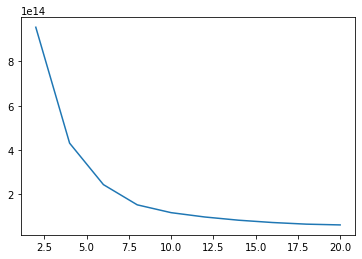

In [36]:
plt.plot(search_range, scores)

This is also called an "elbow plot", where we use to find the elbow point or the turning point indicating the score is becoming plateau. Let's go with `k=2` for now.

In [37]:
km = KMeans(n_clusters=2, random_state=123)

In [38]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [39]:
pd.DataFrame(km.cluster_centers_, columns=predictors, index=[f'cluster_{i}' for i in range(km.n_clusters)])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
cluster_0,324.256843,10.448873,552.499205,0.547004,0.996955,0.687765,11.025783,3.29763,4.636486,1.238521,...,0.352642,0.095004,0.755492,-0.260042,-0.525401,-0.106897,0.282200,0.069104,0.341642,0.155249
cluster_1,700.957313,9.825173,478.033271,0.562082,0.990898,0.705313,9.257690,3.24796,3.487445,1.379787,...,0.367362,0.100495,0.770863,-0.253600,-0.482385,-0.114407,0.284107,0.097991,0.344136,0.165386


### Importance of `Random State`

A random state is a seed/starting point in generating random numbers. It tells the computer where to start. If we don't set it, the result of KMeans and any other algorithms that involve random processes will change every time we execute the algorithm.

**With Random State Set**

In [45]:
km = KMeans(n_clusters=2, random_state=123)
km.fit(X)
pd.DataFrame(km.cluster_centers_, columns=predictors, index=[f'cluster_{i}' for i in range(km.n_clusters)])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
cluster_0,324.256843,10.448873,552.499205,0.547004,0.996955,0.687765,11.025783,3.29763,4.636486,1.238521,...,0.352642,0.095004,0.755492,-0.260042,-0.525401,-0.106897,0.282200,0.069104,0.341642,0.155249
cluster_1,700.957313,9.825173,478.033271,0.562082,0.990898,0.705313,9.257690,3.24796,3.487445,1.379787,...,0.367362,0.100495,0.770863,-0.253600,-0.482385,-0.114407,0.284107,0.097991,0.344136,0.165386


**Without Random State**

Might need to increase the number of clusters to see more obvious change.

In [60]:
km = KMeans(n_clusters=5)
km.fit(X)
pd.DataFrame(km.cluster_centers_, columns=predictors, index=[f'cluster_{i}' for i in range(km.n_clusters)])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
cluster_0,277.592180,10.555504,610.109796,0.553030,1.029220,0.699121,11.573725,3.420542,4.996551,0.863920,...,0.354802,0.093644,0.769729,-0.261092,-0.545369,-0.103165,0.276235,0.066924,0.339818,0.151644
cluster_1,701.075981,9.825432,477.826060,0.562130,0.990895,0.705377,9.249922,3.243328,3.481633,1.380220,...,0.367362,0.100495,0.770791,-0.253593,-0.482222,-0.114428,0.284196,0.098022,0.344088,0.165438
cluster_2,616.089161,9.710315,497.429895,0.555867,0.991958,0.698852,10.259441,3.362937,3.689860,0.908392,...,0.357740,0.097130,0.762617,-0.251707,-0.486138,-0.111403,0.261645,0.073320,0.351674,0.143067
cluster_3,305.330396,10.541850,422.008811,0.544106,0.929515,0.678237,7.387665,2.268722,2.215859,2.674009,...,0.341127,0.098364,0.701495,-0.248526,-0.476365,-0.113239,0.324946,0.088547,0.325304,0.179818
cluster_4,250.957146,10.660261,454.089132,0.527180,0.925337,0.654065,10.305059,2.992490,4.443782,2.298763,...,0.344591,0.096802,0.718631,-0.263109,-0.504161,-0.112730,0.308219,0.071112,0.340056,0.170856


**Bonus**

Other metric and clustering methods too look into:
- Metric: [Silhousette Score](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- Clustering method: [Other implemented algorithms](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)